<a href="https://colab.research.google.com/github/Suniljs/fastai-deeplearning1/blob/master/hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# I applied tabular learner from fastai course on HR Analytics competition on Analytics vidya 
#url for competition: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement
#I was able to achieve f1 score of  51.41% while best score on leader board is 53.58%


#connnecting to google drive where trianing and test datset are present
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
#path in google drive
path="/content/drive/My Drive/Colab Notebooks/HR Analytics"

In [3]:
import pandas as pd 
#reading train dataset
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/HR Analytics/train_LZdllcl.csv')
#reading test/public dataset 
submission=pd.read_csv("/content/drive/My Drive/Colab Notebooks/HR Analytics/test_2umaH9m.csv")


In [4]:
from fastai.tabular import *
#selecting categorical variables 
cat_names = ["department","region","education","gender","recruitment_channel"]
cont_names = ["no_of_trainings","age","previous_year_rating",
                     "length_of_service","KPIs_met >80%","awards_won?",
                     "avg_training_score"]
#preprocessing like misssing values, categorifying and normalizing
procs = [FillMissing, Categorify, Normalize]

sub_dl= TabularList.from_df(submission,cat_names=cat_names,cont_names=cont_names)

train_dl=TabularList.from_df(df,cont_names=cont_names,cat_names=cat_names,procs=procs).split_by_idx(list(range(43846,54808))).label_from_df(cols='is_promoted').add_test(sub_dl).databunch()


In [5]:
#first 10 rows 
train_dl.show_batch(rows=10)

department,region,education,gender,recruitment_channel,previous_year_rating_na,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,target
Technology,region_22,Bachelor's,f,sourcing,False,-0.4144,-0.6271,-1.8952,-1.1374,-0.7391,-0.1536,1.3161,0
Analytics,region_15,Bachelor's,m,other,False,-0.4144,0.8114,1.3919,0.9681,-0.7391,-0.1536,1.6152,0
Sales & Marketing,region_31,Bachelor's,m,other,False,-0.4144,-0.6271,1.3919,-0.6695,-0.7391,-0.1536,-1.0767,0
Sales & Marketing,region_7,Master's & above,m,other,False,2.8869,-0.2348,-0.2516,-0.4356,-0.7391,-0.1536,-1.0019,0
Procurement,region_2,Master's & above,f,sourcing,False,-0.4144,-0.6271,1.3919,0.0323,1.3529,-0.1536,0.6431,0
R&D,region_22,Bachelor's,f,other,False,-0.4144,-0.8886,0.5701,-0.9035,-0.7391,-0.1536,1.4656,0
Technology,region_24,Bachelor's,m,other,False,-0.4144,-0.4963,1.3919,-0.9035,-0.7391,-0.1536,2.3629,1
Operations,region_22,Master's & above,f,sourcing,False,-0.4144,-0.2348,0.5701,-0.4356,-0.7391,-0.1536,-0.1046,0
Analytics,region_13,Master's & above,m,other,False,1.2363,0.0267,-0.2516,-0.2016,-0.7391,-0.1536,1.6152,0
Analytics,region_26,Bachelor's,m,sourcing,False,-0.4144,-0.6271,-0.2516,-0.9035,1.3529,-0.1536,1.4656,0


In [43]:
from sklearn.metrics import f1_score
learn=tabular_learner(train_dl, layers=[400,500,300,200], metrics=accuracy)

In [44]:
learn.fit(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.187267,0.185674,0.937146,00:06


In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(4,max_lr=slice(1e-4/3))

epoch,train_loss,valid_loss,accuracy,time
0,0.182486,0.180273,0.936782,00:07
1,0.182856,0.175291,0.938150,00:06
2,0.175822,0.173712,0.939610,00:07
3,0.173805,0.172826,0.939062,00:07


In [73]:
learn.fit_one_cycle(1,max_lr=slice(1e-4/3))

epoch,train_loss,valid_loss,accuracy,time
0,0.169695,0.169466,0.940704,00:07


In [118]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


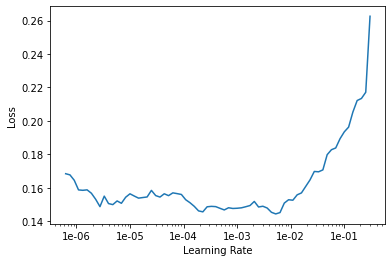

In [119]:
learn.recorder.plot()

In [120]:
learn.fit_one_cycle(1,max_lr=slice(1e-5/3))

epoch,train_loss,valid_loss,accuracy,time
0,0.159718,0.167447,0.940795,00:07


In [122]:
#getting predictions on validation dataset
predictions=learn.get_preds()
test_pred=predictions[0].detach().numpy()
ytrue_test=df.loc[43846:,'is_promoted']

(10962, 2)

In [123]:
#plotting f1 score for various cuts and choosing the optimum cut

f1_score_test_list=[]
f1_score_train_list=[]
prob_cuts=np.arange(0.05,1,0.05)
for prob_cut in prob_cuts:
    y_test_pred=np.where(test_pred[:,1]>prob_cut,1,0)
    f1_score_test=f1_score(ytrue_test,y_test_pred)
    f1_score_test_list.append(f1_score_test)

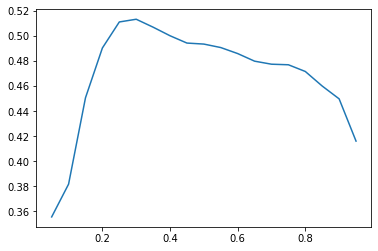

In [124]:
import matplotlib.pyplot as plt
plt.plot(prob_cuts,f1_score_test_list)
plt.show()

In [125]:
max(f1_score_test_list), prob_cuts[np.argmax(f1_score_test_list)]

(0.5131578947368421, 0.3)

In [126]:
#scoring on public dataset 
sub_predictions=learn.get_preds(ds_type=DatasetType.Test)
sub_pred_prob=sub_predictions[0].detach().numpy()
sub_pred_hard=np.where(sub_pred_prob[:,1]>0.3,1,0)

In [127]:
#saving final predictions to drive 
final_df=pd.DataFrame({'pred':sub_pred_hard})
final_df.to_csv("/content/drive/My Drive/Colab Notebooks/HR Analytics/pred_iter8.csv")


In [73]:
#scoring on validation

print(submission.shape)

(23490, 13)


'\ny_sub_pred_np=learn.pred_batch(sub_dl)\ny_sub_pred_np.shape\n'

AttributeError: ignored

In [108]:
learn.save('/content/drive/My Drive/Colab Notebooks/HR Analytics/iter6')

NameError: ignored

In [ ]:
predictions.mean(axis=0)

tensor([0.9351, 0.0649])

In [ ]:
predictions_np=predictions.detach().numpy()

In [ ]:
pd.DataFrame(predictions_np).to_csv('/content/drive/My Drive/Colab Notebooks/HR Analytics/prediction1.csv')

In [129]:
learn.summary

<bound method model_summary of Learner(data=TabularDataBunch;

Train: LabelList (43846 items)
x: TabularList
department Sales & Marketing; region region_7; education Master's & above; gender f; recruitment_channel sourcing; previous_year_rating_na False; no_of_trainings -0.4144; age 0.0267; previous_year_rating 1.3919; length_of_service 0.5002; KPIs_met >80% 1.3529; awards_won? -0.1536; avg_training_score -1.0767; ,department Operations; region region_22; education Bachelor's; gender m; recruitment_channel other; previous_year_rating_na False; no_of_trainings -0.4144; age -0.6271; previous_year_rating 1.3919; length_of_service -0.4356; KPIs_met >80% -0.7391; awards_won? -0.1536; avg_training_score -0.2542; ,department Sales & Marketing; region region_19; education Bachelor's; gender m; recruitment_channel sourcing; previous_year_rating_na False; no_of_trainings -0.4144; age -0.1040; previous_year_rating -0.2516; length_of_service 0.2663; KPIs_met >80% -0.7391; awards_won? -0.1536; avg_